In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings

warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('usedCarListingCleaned.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9702, 22)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",False,0,Fleet or Mixed Use,Clean,1
1,2007,BMW,6,650i Convertible,Stanton,CA,59664,11499,Mineral Silver Metallic,Tan,...,4.8L V-8 Gas,Automatic,RWD,Gas,[],False,0,Fleet or Mixed Use,Clean,3
2,2019,Kia,Optima,LX,Thornton,CO,4816,18586,Ebony Black,Black,...,2.4L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Lane Keep Assist', 'Blueto...",True,1,Personal or Rental Use,Clean,2
3,2017,Ford,Fusion,SE FWD,Denver,NC,99515,8999,Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic (alt),Wesley Chapel,FL,117200,6109,Quartz White Pearl,Beige,...,2.0L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",False,1,Personal or Rental Use,Clean,1


# 0. Data overview

In [15]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

In [14]:
df.describe(include='all')

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
count,9702.00000,9702,9702,9702,9702,9702,9702.000000,9702.000000,9702,9702,...,9702,9702,9702,9702,9702,9702,9702.000000,9702,9702,9702.000000
unique,NaN,51,425,1889,1594,50,NaN,NaN,1057,559,...,181,2,4,7,194,2,NaN,2,5,NaN
top,NaN,Ford,F-150,SE FWD,Houston,TX,NaN,NaN,Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,[],False,NaN,Personal or Rental Use,Clean,NaN
freq,NaN,2500,701,569,167,1145,NaN,NaN,626,2136,...,942,9427,5095,9004,3773,9053,NaN,7564,9585,NaN
mean,2014.20202,NaN,NaN,NaN,NaN,NaN,73884.855184,14285.912389,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.227376,NaN,NaN,1.709441
std,4.55119,NaN,NaN,NaN,NaN,NaN,51650.251756,9431.406826,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.513944,NaN,NaN,1.086408
min,1997.00000,NaN,NaN,NaN,NaN,NaN,7.000000,1500.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,2012.00000,NaN,NaN,NaN,NaN,NaN,35104.250000,8276.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
50%,2016.00000,NaN,NaN,NaN,NaN,NaN,59959.000000,12985.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
75%,2017.00000,NaN,NaN,NaN,NaN,NaN,102641.500000,17498.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000


### Vehicle information summary
1. Model years between 1997-2020
2. Mileage ranging 7 miles to 484,773 miles
3. Price ranging from 1,500 to about 170,000 dollars
4. There are 
9702 unique listings, 
51 Makes, 
425 Models, 
1058 unique exterior colors, 
559 unique interior colors, 
181 unique engines, 
2 unique transmission, 
4 unique drive type, 
7 unique fuel type, 
2 different used type (cpo or used)

### Vehicle history
1. 2 unique usage type
2. 4 unique titles
3. Number of accidents ranging from 0 to 5
4. Number of previous owners raning from 0(rental car, assuming no previous owners) to 13

## Vehicle geospatial info
1. 50 states
2. 1594 cities

# 1. Vehicle listing count analysis

## 1.1 Vehicle listings for different years

Text(0.5, 1.0, 'Listings per Model Year')

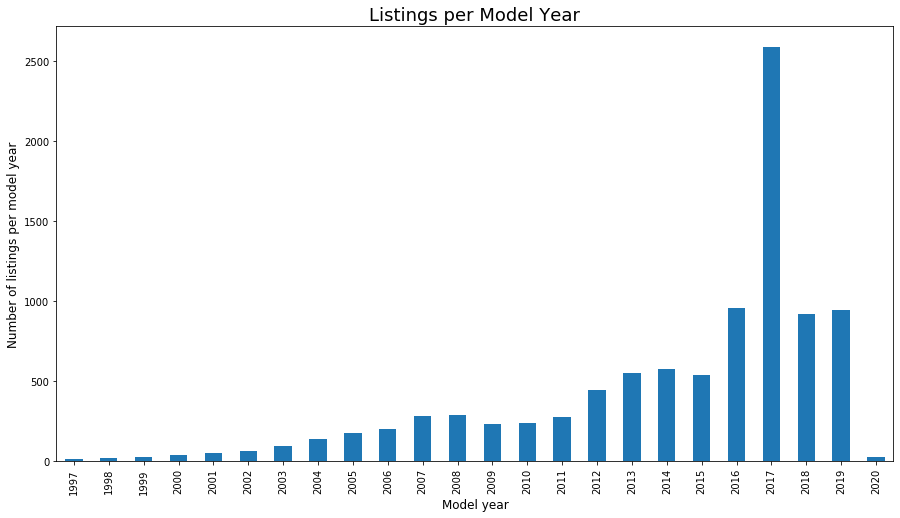

In [51]:
df.groupby(['year'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per model year', fontsize=12)
plt.xlabel('Model year', fontsize=12)
plt.title('Listings per Model Year', fontsize=18)
plt.show()

In [57]:
df[df['year']==2017]['year'].count()/df['year'].count()

0.26664605236033806

3-year used cars take dominants and account for about 27% of total used car listings. 
One important reason is that 3-year lease cars are very popular and after three-year lease, the car users will return the leased car to dealers and dealers will list them as used cars online.

## 1.2 Vehicle listings from different states

Text(0.5, 1.0, 'Listings per State')

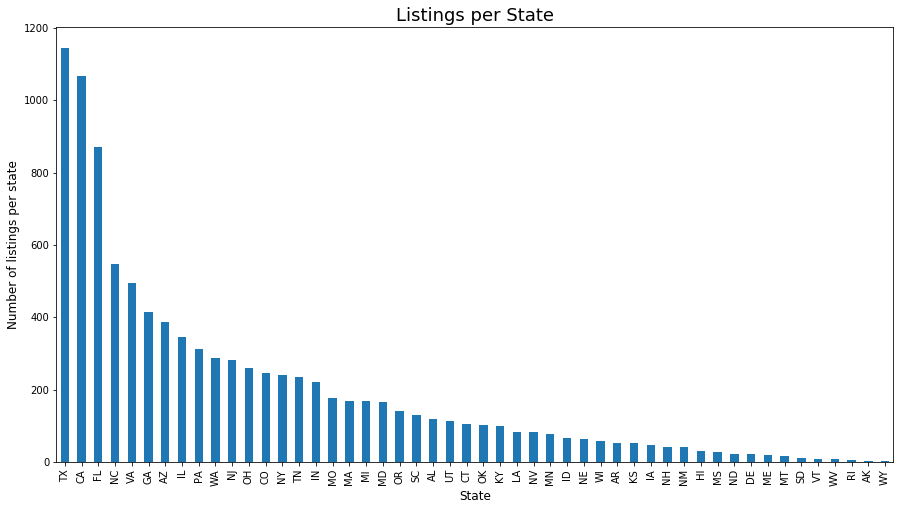

In [54]:
df.groupby(['state'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

## 1.3 Vehicle listings for different carmakers

Text(0.5, 1.0, 'Listings per Automaker')

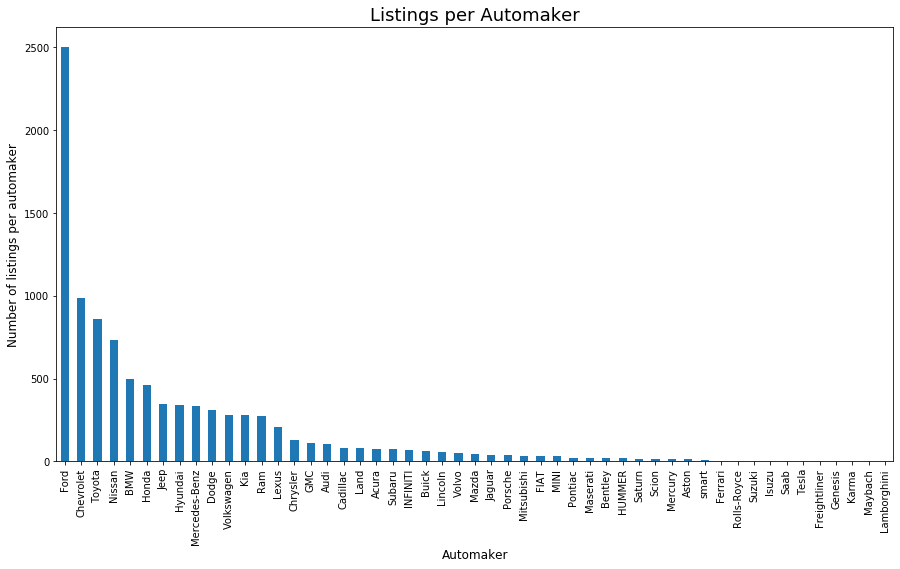

In [60]:
df.groupby(['make'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

Ford is the domimant brand on the used car market.

Chevrolet, Toyota, Nissan, BMW are another four makers in the top 5 makers.

## 1.4 Vehicle listings for different title


Text(0.5, 1.0, 'Listings of Different Titles')

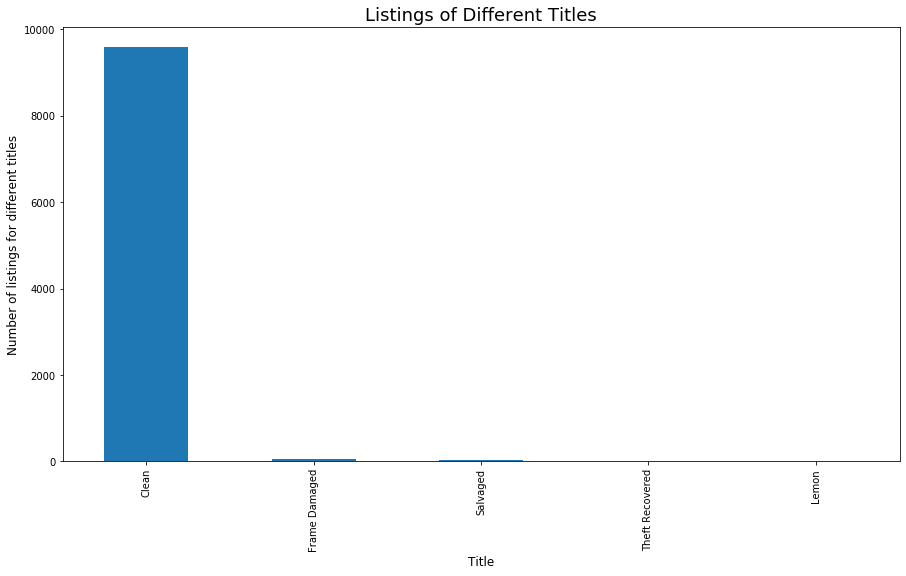

In [62]:
df.groupby(['title'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different titles', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.title('Listings of Different Titles', fontsize=18)
plt.show()

## 1.5 Vehicle listings for different number of accidents

Text(0.5, 1.0, 'Listings of Different Number of Accidents')

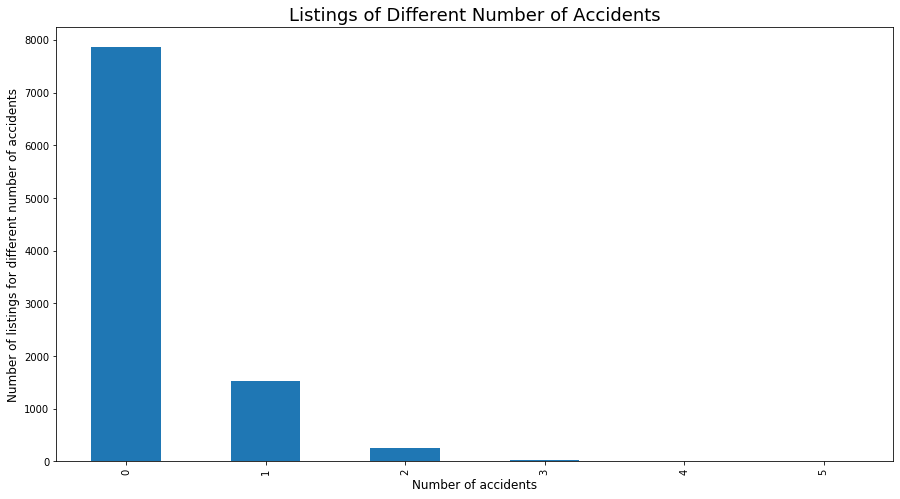

In [66]:
df.groupby(['num_accident'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

## 1.6 Vehicle listings for different number of previous owners

Text(0.5, 1.0, 'Listings for Different Number of Previous Owners')

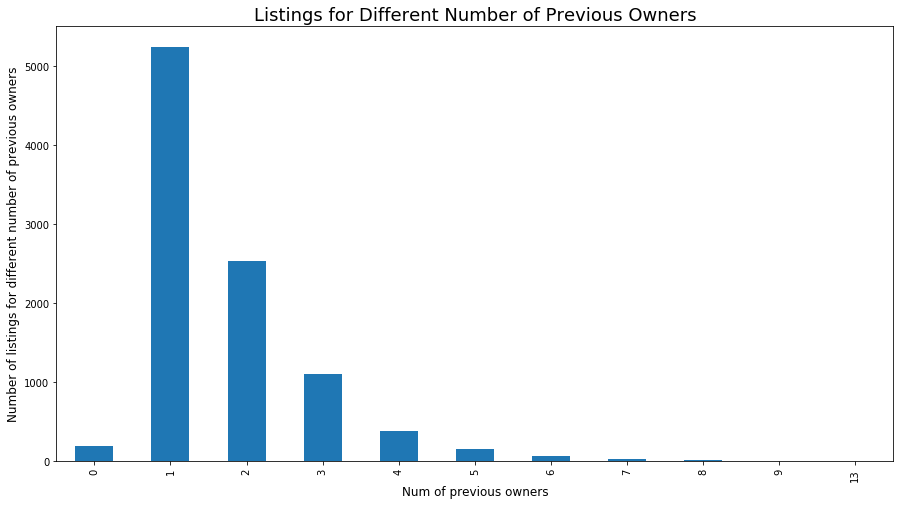

In [69]:
df.groupby(['num_owner'])['year'].count().plot(kind='bar', figsize=(15,8), )
plt.ylabel('Number of listings for different number of previous owners', fontsize=12)
plt.xlabel('Num of previous owners', fontsize=12)
plt.title('Listings for Different Number of Previous Owners', fontsize=18)
plt.show()

## 1.7 Vehicle listings for different usage type

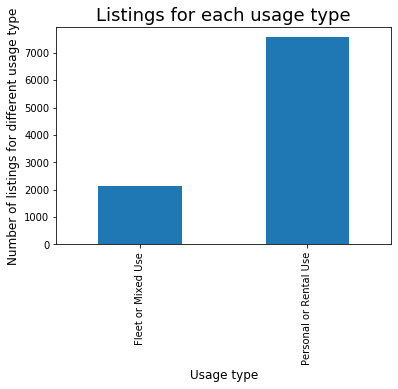

In [118]:
df.groupby(['usage_type'])['year'].count().plot(kind='bar')
plt.ylabel('Number of listings for different usage type', fontsize=12)
plt.xlabel('Usage type', fontsize=12)
plt.title('Listings for each usage type', fontsize=18)
plt.show()

Fleet or Mixed Use: Fleet use is for companies such as Car rental company, police depearment, taxicab company, public utility companies.

Personal or Rental Use: Car lease or personal car.

## 1.8 Exterior color(select top 20 colors)

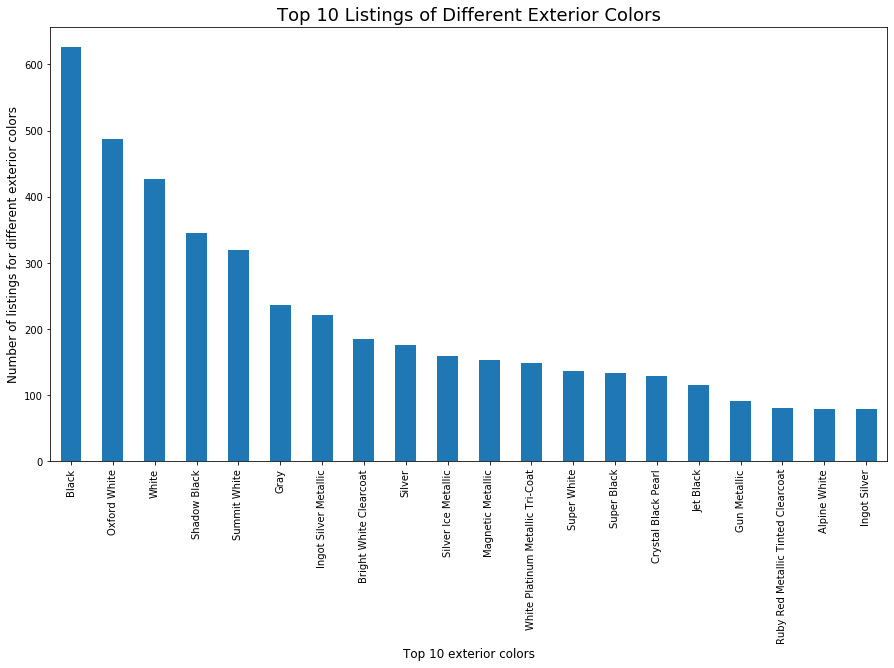

In [126]:
df.groupby(['exterior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different exterior colors', fontsize=12)
plt.xlabel('Top 10 exterior colors', fontsize=12)
plt.title('Top 10 Listings of Different Exterior Colors', fontsize=18)
plt.show()

## 1.9 Interior color(select top 20 colors)

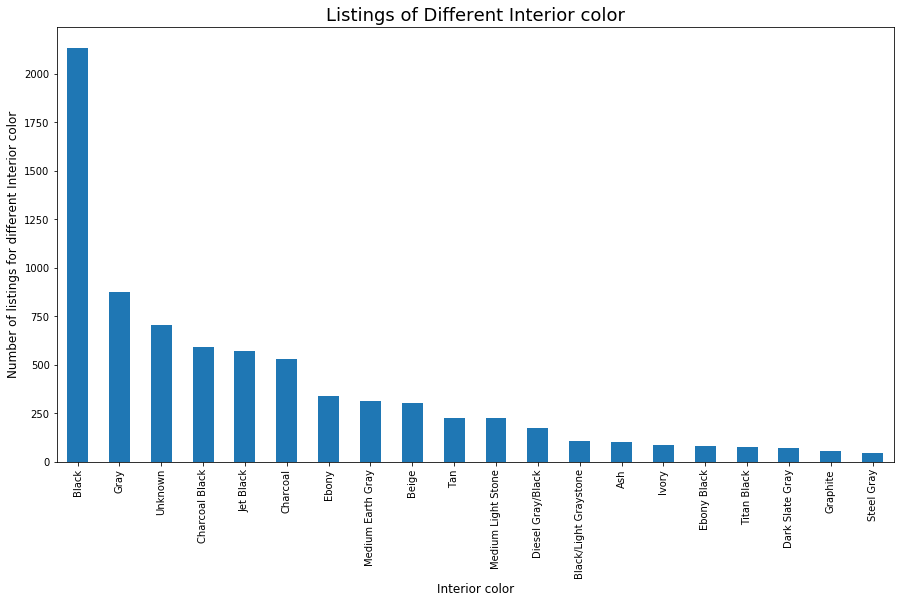

In [124]:
df.groupby(['interior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different Interior color', fontsize=12)
plt.xlabel('Interior color', fontsize=12)
plt.title('Listings of Different Interior color', fontsize=18)
plt.show()

## 1.10 MPG for both city and highway

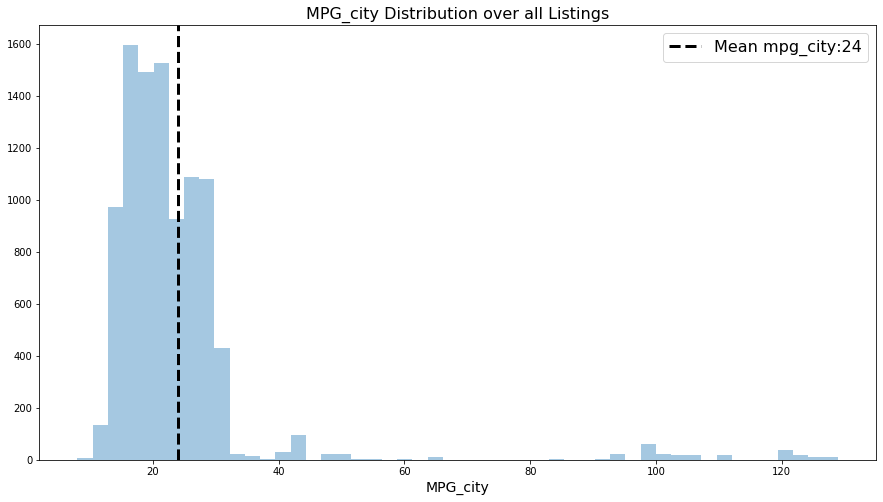

In [103]:
# look at mpg_city overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_city,kde=False)
plt.xlabel('MPG_city',fontsize=14)
plt.axvline(df.mpg_city.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_city:'+'{0:.0f}'.format(np.mean(df.mpg_city)))
plt.title('MPG_city Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

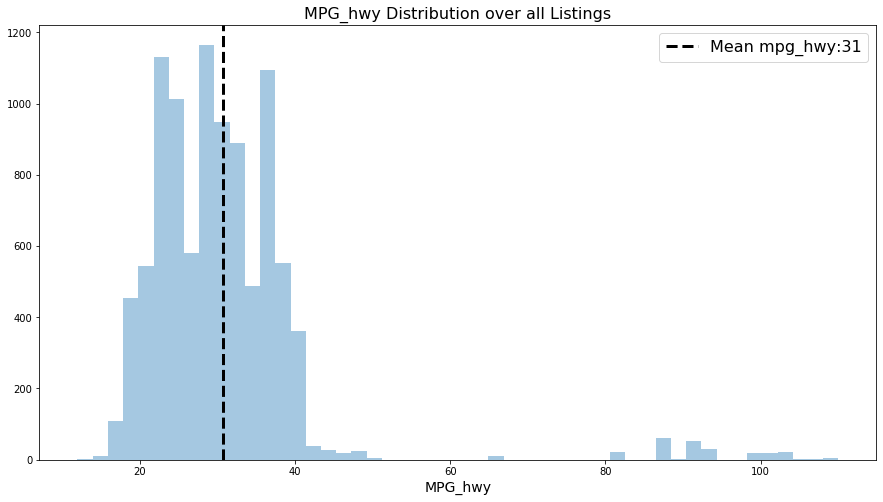

In [104]:
# look at mpg_hwy overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_hwy,kde=False)
plt.xlabel('MPG_hwy',fontsize=14)
plt.axvline(df.mpg_hwy.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_hwy:'+'{0:.0f}'.format(np.mean(df.mpg_hwy)))
plt.title('MPG_hwy Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

## 1.11 Transmission, Drive_type for Listings

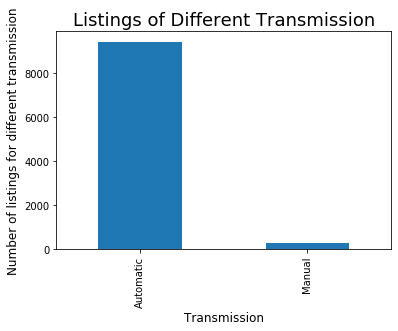

In [113]:
df.groupby(['transmission'])['year'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of listings for different transmission', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.title('Listings of Different Transmission', fontsize=18)
plt.show()

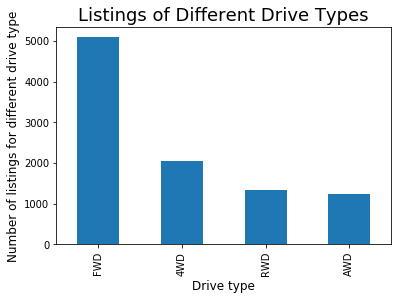

In [111]:
df.groupby(['drive_type'])['year'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of listings for different drive type', fontsize=12)
plt.xlabel('Drive type', fontsize=12)
plt.title('Listings of Different Drive Types', fontsize=18)
plt.show()

## 1.12 Listings for either Certified Pre-owned or not

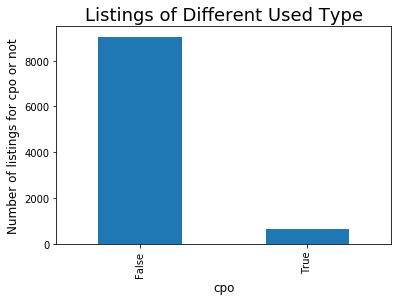

In [112]:
df.groupby(['cpo'])['year'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of listings for cpo or not', fontsize=12)
plt.xlabel('cpo', fontsize=12)
plt.title('Listings of Different Used Type', fontsize=18)
plt.show()

## 1.13 Price distribution

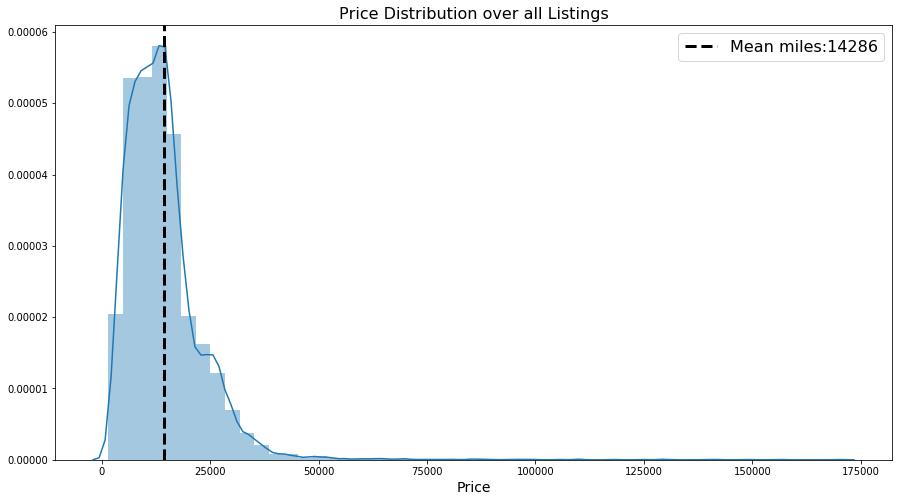

In [119]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('Price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

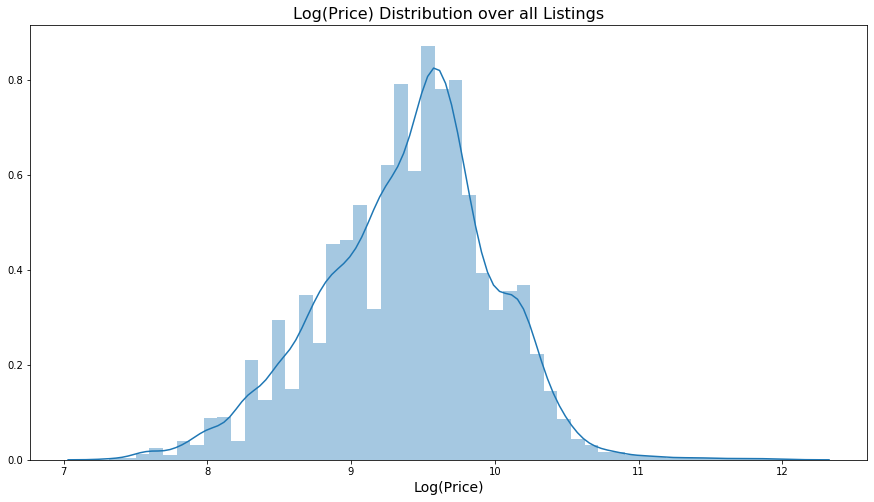

In [120]:
# log transformation for price. 
# After the transformation, the distribution is more like a normal distribution
plt.figure(figsize=(15,8))
log_price = np.log(df.price)
sns.distplot(log_price,kde=True)
plt.xlabel('Log(Price)',fontsize=14)
plt.title('Log(Price) Distribution over all Listings',fontsize=16)
plt.show()

## 1.14 Mileage distribution

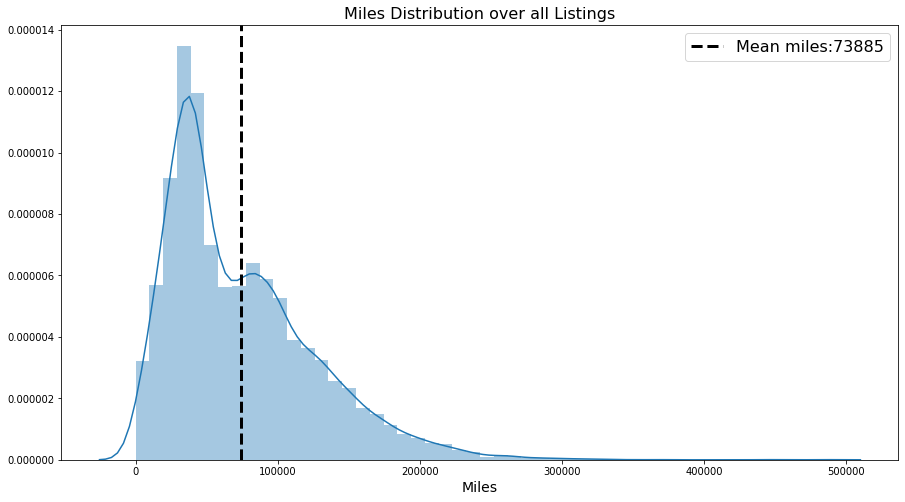

In [121]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mileage,kde=True)
plt.xlabel('Miles',fontsize=14)
plt.axvline(df.mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.mileage)))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

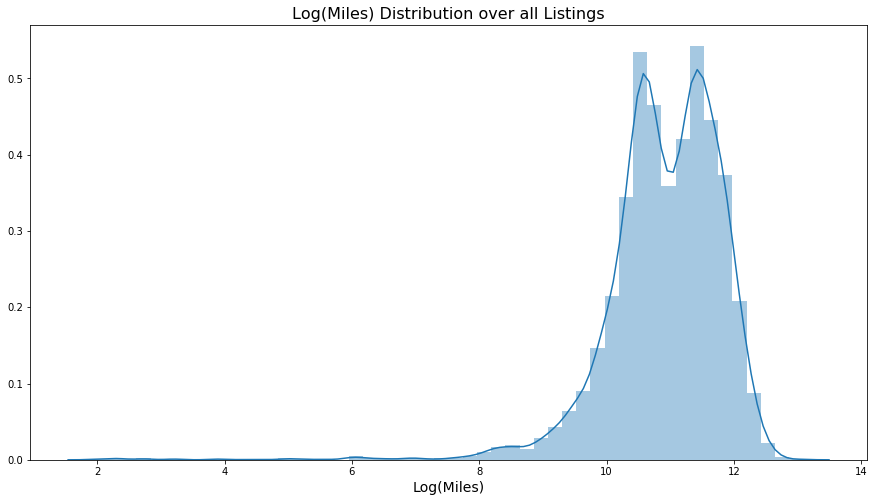

In [122]:
# It's not a normal distribution(a little bit right-skewed), try log transformation
fig = plt.figure(figsize=(15,8))
log_mile = np.log(df.mileage)
sns.distplot(log_mile,kde=True)
plt.xlabel('Log(Miles)',fontsize=14)
plt.title('Log(Miles) Distribution over all Listings',fontsize=16)
plt.show()
# But the log one is also not that good.. I will keep the original distribution

# 2. How price is related to other variables

In [128]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

## 2.1 How the model year affect the price

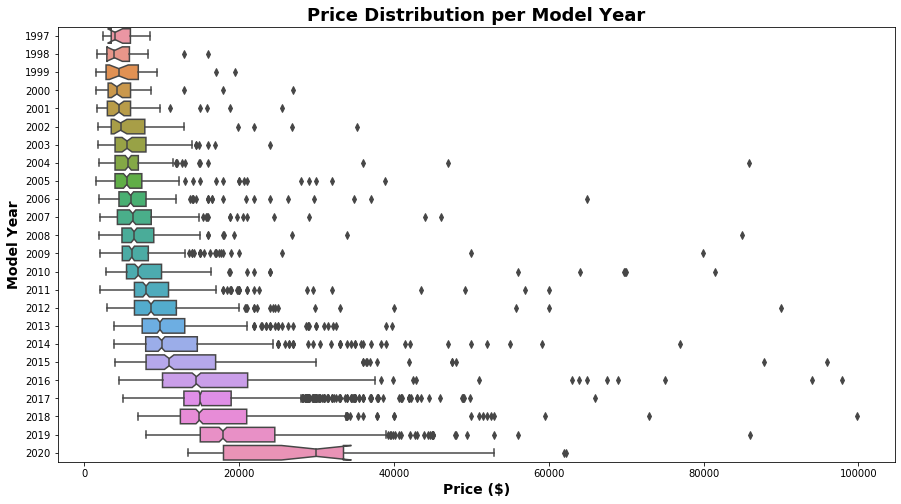

In [131]:
# look at price by year boxplot
# In order to better visualize the impact, I will limit the price up to 100,000
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='year',data=df[df.price <= 100000],
            order=sorted(df.year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.show()

## 2.2 How does the automaker impact price?

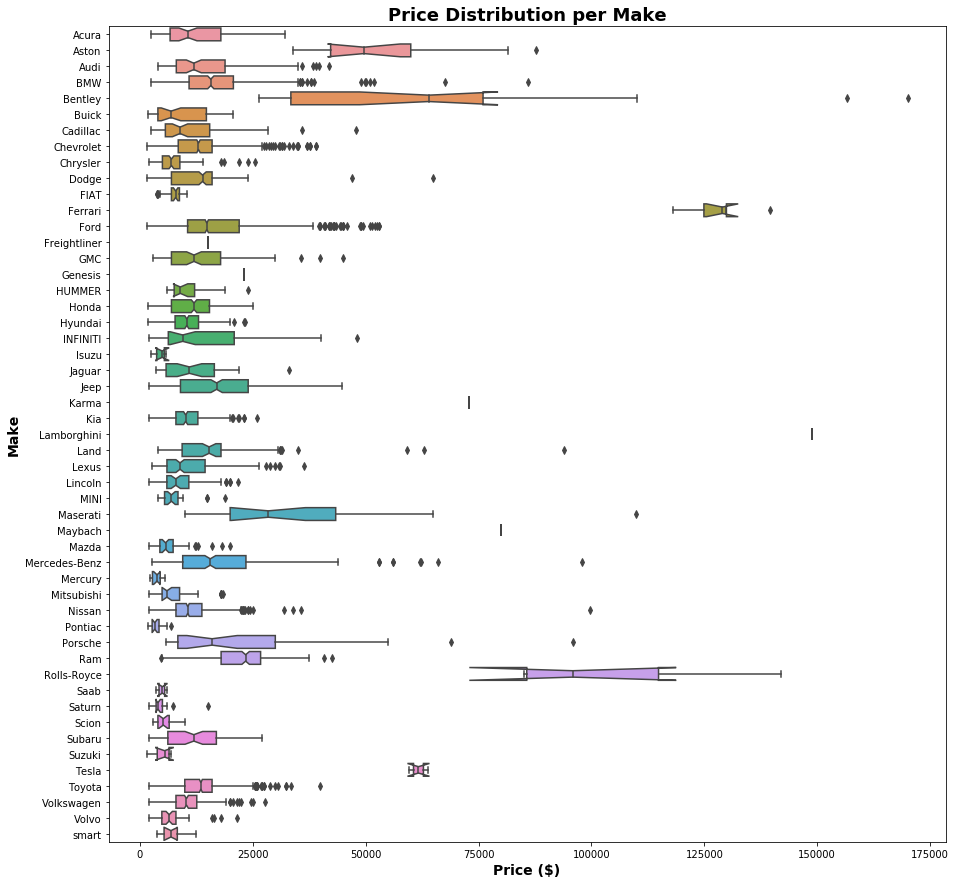

In [136]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.boxplot(x='price',y='make',data=df,
            order=sorted(df.make.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

## 2.3 Will certified pre-owned cars have a higher price?

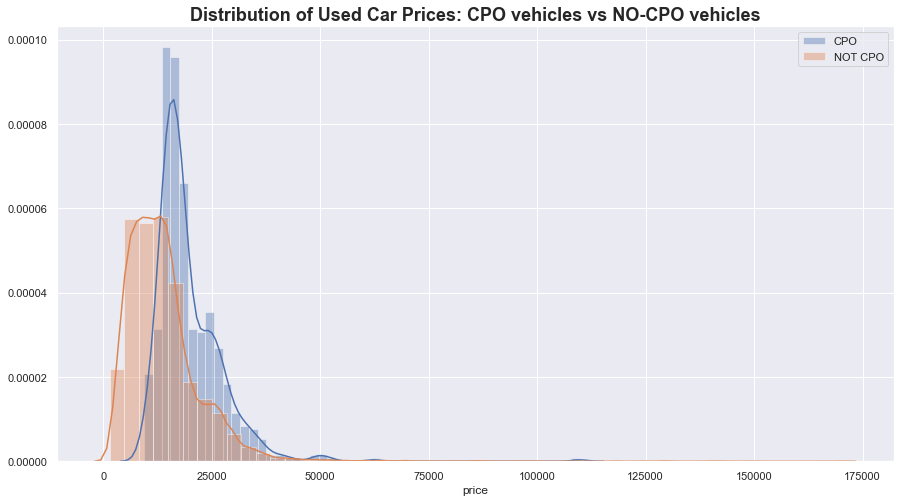

In [165]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.distplot(df.price[df['cpo']==True],hist_kws={"label":'CPO'})
sns.distplot(df.price[df['cpo']==False],hist_kws={"label":'NOT CPO'})
plt.title('Distribution of Used Car Prices: CPO vehicles vs NO-CPO vehicles',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

## 2.4 Will the title of vehicles impact the resale price?

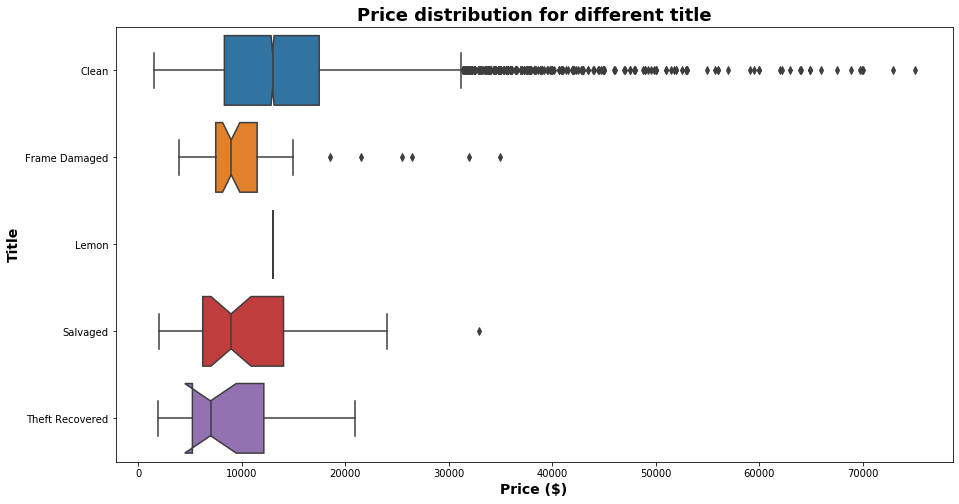

In [139]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# In order to better visualize the impact, I will restrict the price under 75000
sns.boxplot(x='price',y='title',data=df[df.price <= 75000],
            order=sorted(df.title.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Title',fontsize=14,fontweight="bold")
plt.title('Price distribution for different title',fontsize=18,fontweight="bold")
plt.show()

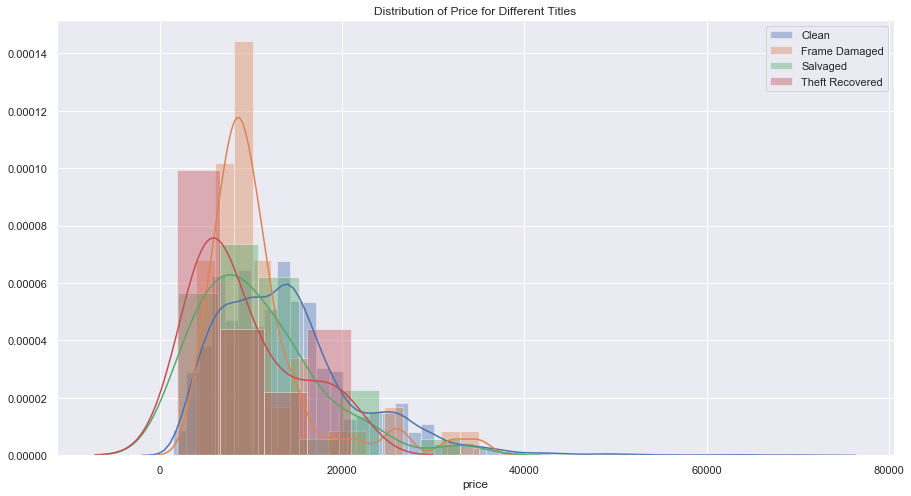

In [170]:
## In order to better visualize, I exclude the cars whose prices are over 75000
## Also get rid of Lemon car since there is only one data point
sns.set(rc={"figure.figsize": (15, 8)})
sns.distplot(df.price[(df['title']== 'Clean')&(df.price<75000)],hist_kws={"label":'Clean'})
sns.distplot(df.price[(df['title']== 'Frame Damaged')&(df.price<75000)],hist_kws={"label":'Frame Damaged'})
sns.distplot(df.price[(df['title']== 'Salvaged')&(df.price<75000)],hist_kws={"label":'Salvaged'})
sns.distplot(df.price[(df['title']== 'Theft Recovered')&(df.price<75000)],hist_kws={"label":'Theft Recovered'})

plt.title('Distribution of Price for Different Titles')
plt.legend()
plt.show()

## 2.5 How are the prices distributed at different states?

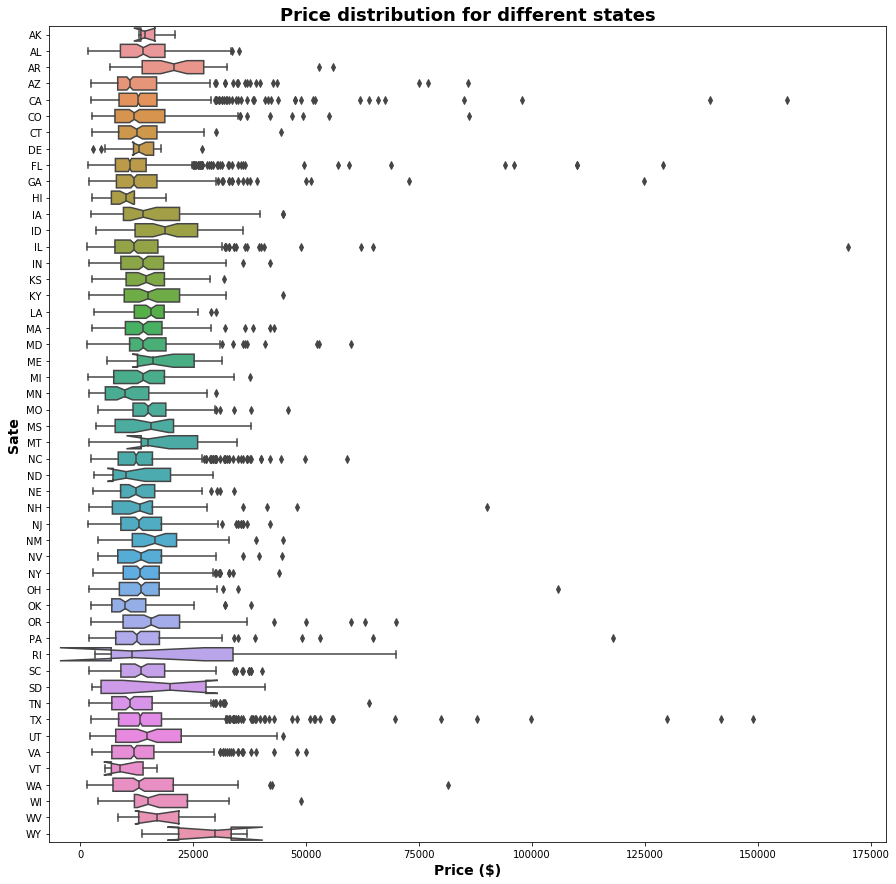

In [148]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.boxplot(x='price',y='state',data=df,
            order=sorted(df.state.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Sate',fontsize=14,fontweight="bold")
plt.title('Price distribution for different states',fontsize=18,fontweight="bold")
plt.show()

## 2.6 How will the mileage impact resale price?

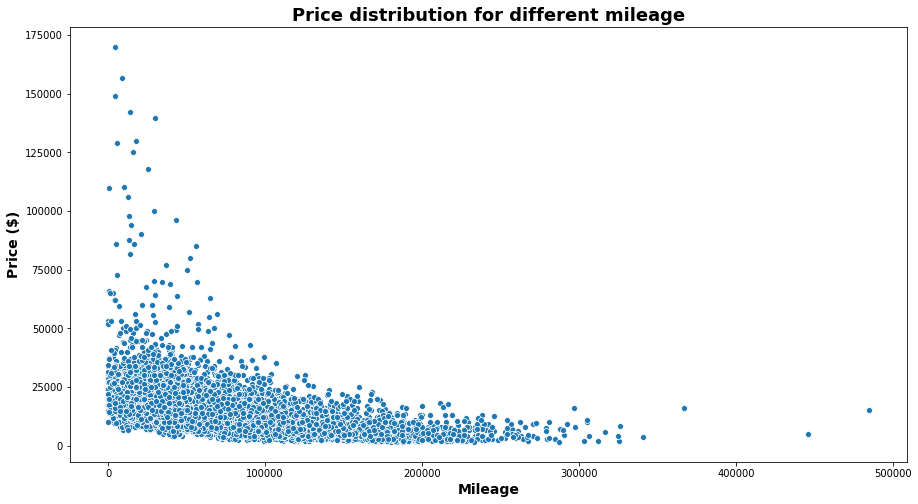

In [151]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mileage',y='price',data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Price distribution for different mileage',fontsize=18,fontweight="bold")
plt.show()

## 2.7 How will the fuel_type impact resale price? Is the resale price for alternative vehicles higher?

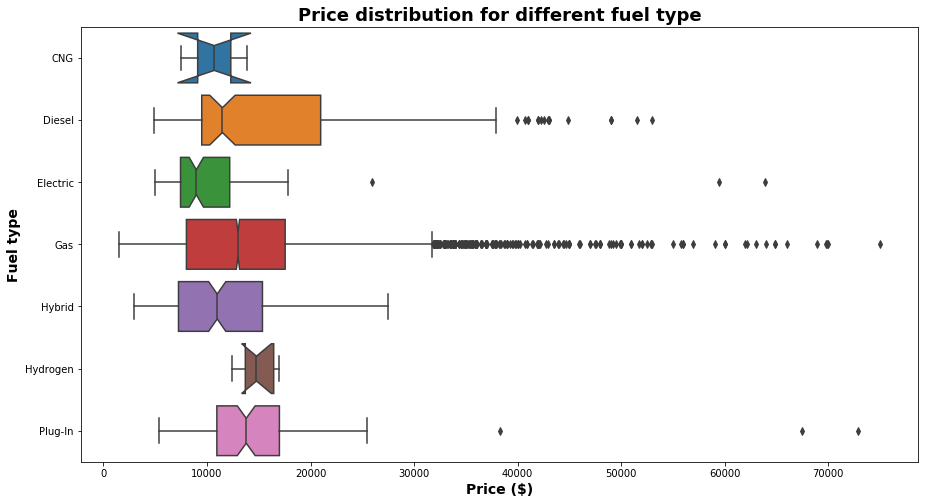

In [160]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# in order to better visualize, I will limit the price under 75000
sns.boxplot(x='price',y='fuel_type',data=df[df.price <= 75000],
            order=sorted(df.fuel_type.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Fuel type',fontsize=14,fontweight="bold")
plt.title('Price distribution for different fuel type',fontsize=18,fontweight="bold")
plt.show()

## 2.8 How will the mpg impact resale price?
Since mpg is highly related to fuel type, so I will use different colors for different fuel type

### City mpg first

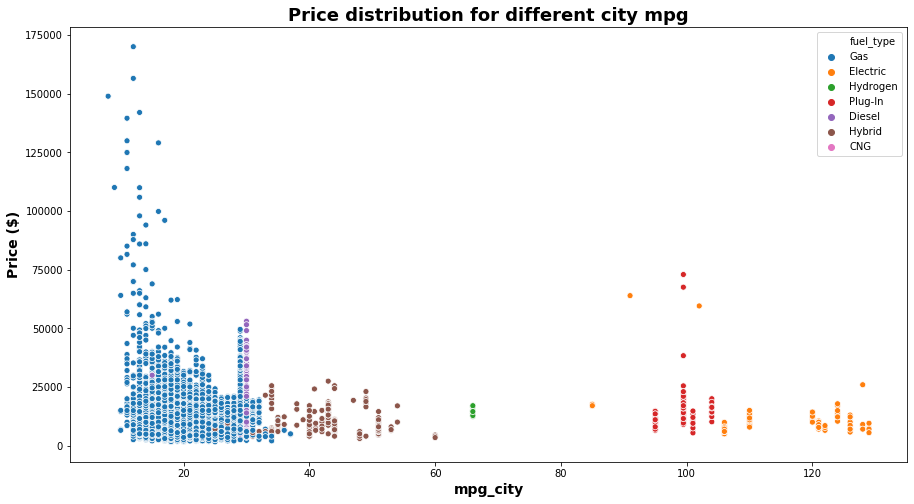

In [157]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mpg_city',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_city',fontsize=14,fontweight="bold")
plt.title('Price distribution for different city mpg',fontsize=18,fontweight="bold")
plt.show()

### Highway mpg

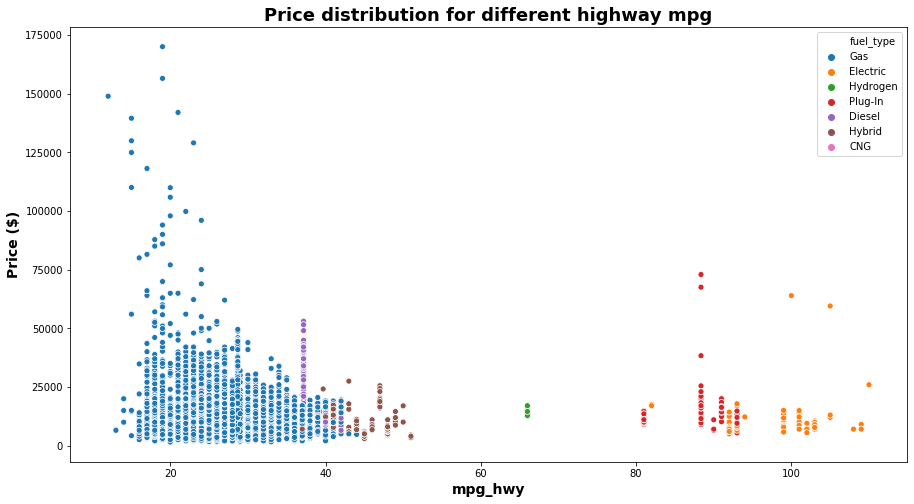

In [158]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mpg_hwy',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_hwy',fontsize=14,fontweight="bold")
plt.title('Price distribution for different highway mpg',fontsize=18,fontweight="bold")
plt.show()